### Means Korrelieren

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [23]:
atac_data=pd.read_csv("D:\\Uni\\4. Semester\\Bioinfo\\datasets\\processed atac seq data and called peaks.csv")
print(mean_atac_data.loc['LTHSC.34-.BM'])

NameError: name 'mean_atac_data' is not defined

In [20]:
#Datei einlesen
atac_data=pd.read_csv("D:\\Uni\\4. Semester\\Bioinfo\\datasets\\processed atac seq data and called peaks.csv")

#zelltypnamen aus erster zeile nehmen
celltype_names=atac_data.iloc[0, 8:]

# nur peakdaten benutzen und restliche spalten auslassen
score_abgd=atac_data.iloc[1:, 8:].copy().astype(float)

# log2 Transformation
peak_signal_log = np.log2(score_abgd+1)

#Zelltypnamen als Spaltennamen benutzen
peak_signal_log.columns=celltype_names.values

#mean berechnen pro zelltyp
mean=peak_signal_log.groupby(peak_signal_log.columns, axis=1).mean()
cell_means=mean.mean(axis=0)

#Transponieren
mean_T=cell_means.T

#dataframe
mean_df=mean_T.to_frame(name='mean_accessibility')
mean_df.index.name='Zelltyp'


print(mean_T.head())


C:\Users\User\AppData\Local\Temp\ipykernel_6364\764912592.py:17: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  mean=peak_signal_log.groupby(peak_signal_log.columns, axis=1).mean()


Zelltyp
0.10    1.545527
0.11    1.549998
0.12    1.521084
0.13    1.570888
0.14    1.544796
dtype: float64


### pearson correlation definition

(98, 512595)
(87, 17535)
pearson-correlation: r= 0.8455, p-Wert: 0.0000e+00


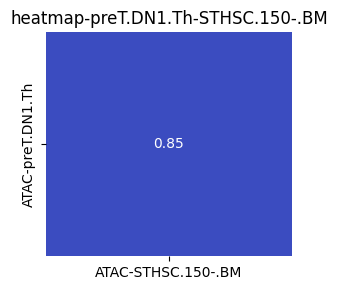

pearson-correlation: r= 0.9121, p-Wert: 0.0000e+00


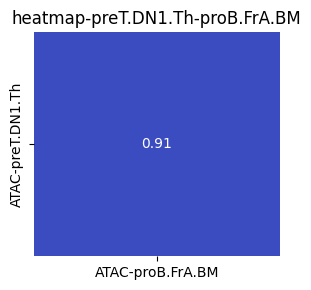

pearson-correlation: r= 0.8318, p-Wert: 0.0000e+00


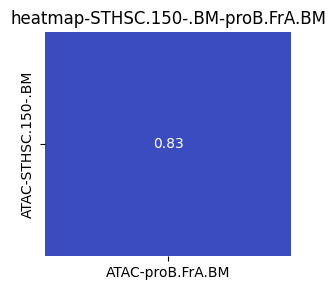

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress
from itertools import combinations

atac_data=pd.read_csv("D:\\Uni\\4. Semester\\Bioinfo\\datasets\\processed atac seq data and called peaks.csv").T
rna_data=pd.read_csv("D:\\Uni\\4. Semester\\Bioinfo\\datasets\\processed rna seq data.csv").T
qc_metrics=pd.read_excel("D:\\Uni\\4. Semester\\Bioinfo\\datasets\\summary of immune cell populationsprofiled by atac.xlsx")
qc_metrics_cutoff=qc_metrics.iloc[:,1:]

print(atac_data.shape)
print(rna_data.shape)

def pearson_correlation (plot_type, cell_list, df1, df1_name, df2=None, df2_name=None):

    '''
    df1: first Dataframe
    df2: second Dataframe
    df1_name: atac/rna/qc/...
    df2_name: atac/rna/qc/...
    cell1: name of row/celltype of cell 1
    cell2: name of row/celltype of cell 2
    plot_type: scatterplot/heatmap
    '''

    # wenn nur ein dataframe gegeben ist, sind beide df1
    if df2 is None:
        df2=df1
        df2_name=df1_name

    # falls nur ein df, alle KOmbinationen der verschiedenen Zellen miteinander

    if df1 is df2:
        pairs=[]
        for i in range(len(cell_list)):
            for j in range(i+1, len(cell_list)):
                pairs.append((cell_list[i], cell_list[j]))
    else: 
        #zwei datensätze, jede Zelle korreliert mit sich selbst im anderen datensatz
        pairs=[(cell, cell) for cell in cell_list]
        
    #wenn nur ein zellname gegeben, sind beide cell1
    #if cell2 is None: 
     #   cell2=cell1

    for cell1, cell2 in pairs: 
        row1=pd.to_numeric(df1.loc[cell1], errors='coerce')
        row2=pd.to_numeric(df2.loc[cell2], errors='coerce')

    # pearson correlation
        r, p_wert=pearsonr(row1, row2)
        print(f"pearson-correlation: r= {r:.4f}, p-Wert: {p_wert:.4e}")

    #scatterplot
        if plot_type.lower()=='scatterplot':
            plt.figure(figsize=(6,4))
            sns.scatterplot(x=row1, y=row2)
            slope, intercept, _, _, _ = linregress(row1, row2)
            x_vals = pd.Series(sorted(row1))
            y_vals = slope * x_vals + intercept
            plt.plot(x_vals, y_vals, color='purple', label='Regression')
            plt.xlabel(f"{df1_name}-{cell1}")
            plt.ylabel(f"{df2_name}-{cell2}")
            plt.title(f'scatterplot-{cell1}-{cell2}')
            plt.tight_layout()
            plt.show()

    #heatmap
        elif plot_type.lower()=='heatmap':
            plt.figure(figsize=(3,3))
            sns.heatmap([[r]], annot=True, cmap='coolwarm', cbar=False, xticklabels=[f"{df2_name}-{cell2}"], yticklabels=[f"{df1_name}-{cell1}"])
            plt.title(f'heatmap-{cell1}-{cell2}')
            plt.tight_layout()
            plt.show()

# test anwendung
# , df2=rna_data, df2_name='RNA'
pearson_correlation(plot_type='heatmap', cell_list=['preT.DN1.Th', 'STHSC.150-.BM', 'proB.FrA.BM'], df1=atac_data, df1_name='ATAC')

        


In [43]:
qc_metrics=pd.read_excel("D:\\Uni\\4. Semester\\Bioinfo\\datasets\\summary of immune cell populationsprofiled by atac.xlsx")
qc_metrics_cutoff=qc_metrics.iloc[:,1:]

print(list(qc_metrics_cutoff.index))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180]
